# Multiple Linear Regression 

In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

# Data Preprocessing

In [66]:
raw_data = pd.read_csv('./data.csv')
raw_data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [67]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [68]:
raw_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:xlabel='R&D Spend'>

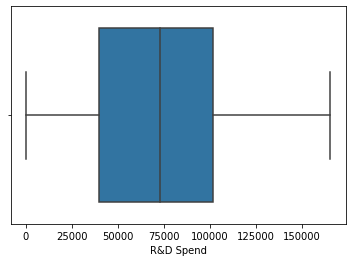

In [69]:
sns.boxplot(x=raw_data['R&D Spend'])

<AxesSubplot:xlabel='Administration'>

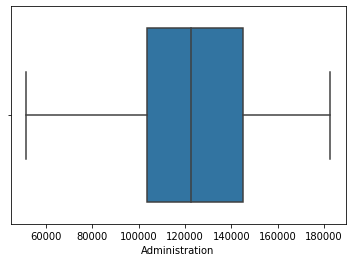

In [70]:
sns.boxplot(x=raw_data['Administration'])

<AxesSubplot:xlabel='Marketing Spend'>

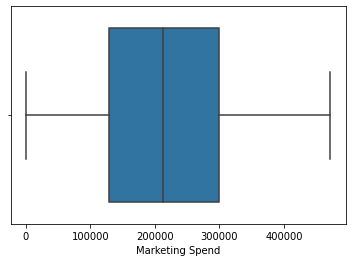

In [71]:
sns.boxplot(x=raw_data['Marketing Spend'])

<AxesSubplot:xlabel='Profit'>

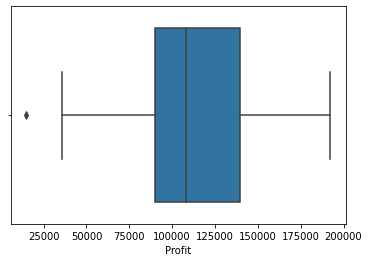

In [72]:
sns.boxplot(x=raw_data['Profit'])

From the above boxplot we can see that the profit column has outliers at the lower_limit 

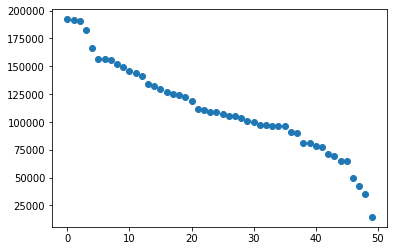

In [73]:
plt.scatter(raw_data.index,raw_data['Profit'])

In [74]:
iqr = raw_data['Profit'].quantile(0.75) - raw_data['Profit'].quantile(0.25)
q1 = raw_data['Profit'].quantile(0.25)
q3 = raw_data['Profit'].quantile(0.75)
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
print('Lower Limit:',lower_limit)
print('Upper Limit:',upper_limit)

Lower Limit: 15698.290000000023
Upper Limit: 214206.58999999997


In [75]:
raw_data[raw_data['Profit']<lower_limit]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


We have found the outlier at row 49 of the dataset
Replacing the outlier with lower_limit

In [76]:
raw_data['Profit'] = np.where(raw_data['Profit']<lower_limit,lower_limit,raw_data['Profit'])

In [77]:
raw_data['Profit'].describe()

count        50.000000
mean     112032.977000
std       40256.292081
min       15698.290000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Profit'>

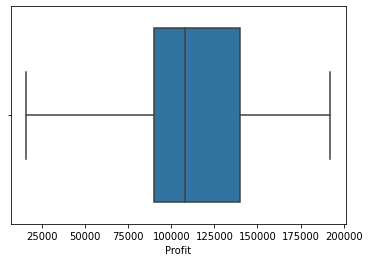

In [78]:
sns.boxplot(x=raw_data['Profit'])

(array([ 1.,  3.,  2.,  6., 10.,  8.,  7.,  7.,  2.,  4.]),
 array([ 15698.29 ,  33354.644,  51010.998,  68667.352,  86323.706,
        103980.06 , 121636.414, 139292.768, 156949.122, 174605.476,
        192261.83 ]),
 <BarContainer object of 10 artists>)

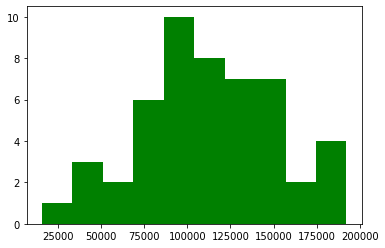

In [79]:
plt.hist(raw_data['Profit'],bins=10,color='green')

In [80]:
raw_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.973278
Administration,0.241955,1.000000,-0.032154,0.200885
Marketing Spend,0.724248,-0.032154,1.000000,0.747993
Profit,0.973278,0.200885,0.747993,1.000000


# Processing catagorical variables

In [81]:
raw_data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [82]:
dummy_data = pd.get_dummies(raw_data['State'])

In [83]:
# dropped one colum to avoid dummy variable trap
dummy_data.drop(columns=['California'],inplace=True)

In [84]:
data = pd.concat([raw_data,dummy_data],axis=1,)
data.drop(columns=['State'],inplace=True)

In [85]:
data

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


# Checking Multicollinearity

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [89]:
vif=pd.DataFrame()
vif['features'] = data.drop(['Profit'],axis=1).columns

In [90]:
vif['VIF'] = [VIF(data.drop(['Profit'],axis=1).values,i) for i in range(len(data.drop(['Profit'],axis=1).columns))]

In [91]:
vif

,features,VIF
0,R&D Spend,8.451019
1,Administration,4.950277
2,Marketing Spend,8.092278
3,Florida,2.004519
4,New York,1.928836


No significant multicollinearity detected

# Spliting training and testing set

In [44]:
x = data.drop(columns=['Profit'],axis=1)
y = data['Profit']

In [41]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)

# Training model

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()

In [100]:
model.fit(x_train,y_train)

LinearRegression()

In [109]:
model.coef_

array([ 7.73335031e-01, -9.33715500e-03,  2.89415184e-02,  5.32147221e+02,
        2.29148185e+02])

In [101]:
model.score(x_train,y_train)

0.9435072163319641

In [103]:
y_pred = model.predict(x_train)

In [102]:
model.score(x_test,y_test)

0.9647579776635521